In [1]:
# Enable autoloading for utils.py and convert.py
%load_ext autoreload
%autoreload 2

In [2]:
from scipy.io.idl import readsav
import matplotlib.pyplot as plt
import numpy as np
import utils
from utils import S
import convert
import csv

Warning, 6 of 3739 bins contained negative fluxes; they have been set to zero.


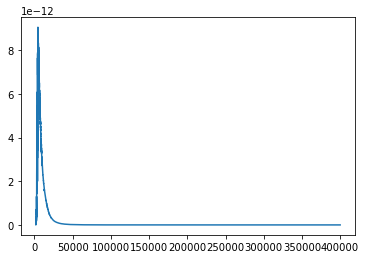

In [4]:
hd_spectrum = utils.get_hd_spectrum()
hd_spectrum.convert('Angstrom')
hd_spectrum.convert('flam')
plt.plot(hd_spectrum.wave, hd_spectrum.flux)
hd_spectrum = normalize_spectrum(
    spectrum=hd_spectrum,
    pivot_wavelength=nh_observation[f'{input_bandpass_name}_pivot_wavelength'],
    calib_flux=nh_observation[f'{input_bandpass_name}_calib_flux'],
    input_obs_to_target=1,
    input_target_to_sun=1,
    output_obs_to_target=1,
    output_target_to_sun=1,
)

In [5]:
# gain is 58.5 e-/count
observed = {
    'blue': 188.6 * 58.5, 
    'red': 527.8 * 58.5, 
    'nir': 347.5 * 58.5, 
    'ch4': 97.0 * 58.5,
}
# TODO: multiply by exposure times
